## 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Zoo Dataset

In [2]:
df = pd.read_csv('zoo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
X = df.iloc[:, 1:17]
X.shape

(101, 16)

In [5]:
y = df.iloc[:, 17]
y.shape

(101,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

In [7]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier(criterion = "entropy")
clf = DTmodel.fit(X_train, y_train)

In [8]:
pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


In [9]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test, pred))

[[9 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]


In [10]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) 

In [11]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.93      0.93      0.90        21
weighted avg       0.98      0.95      0.95        21



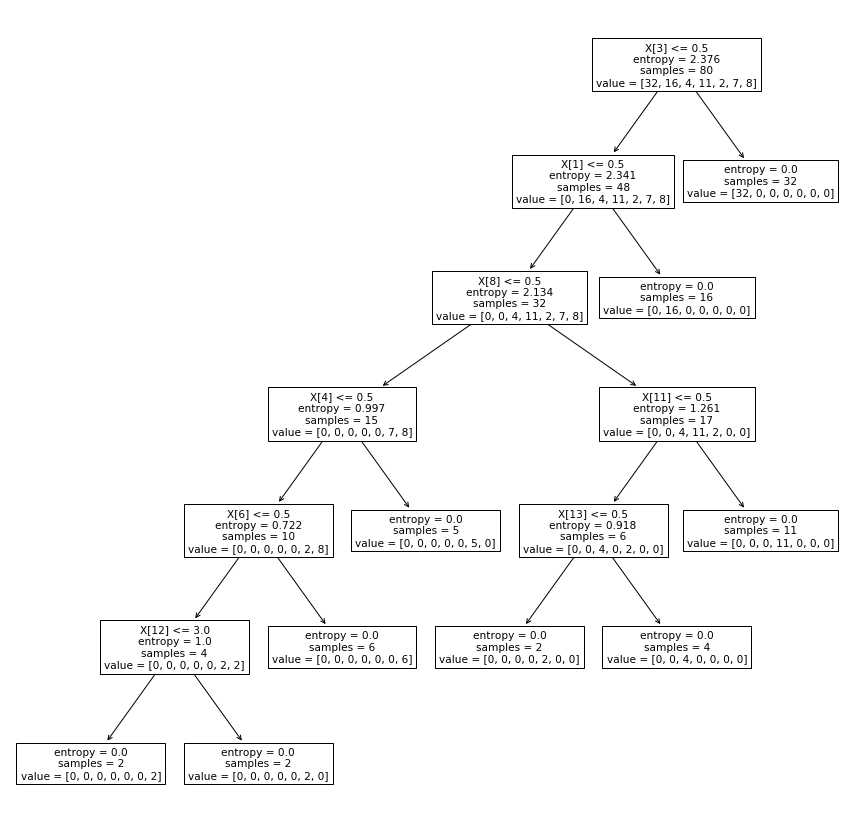

In [12]:
plt.figure(figsize = (15, 15))
tree.plot_tree(DTmodel)
plt.show()